## keras 回调函数

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os,sys,time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

In [3]:
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train.astype(np.float32))

StandardScaler()

In [4]:
X_train_std = std_scaler.transform(X_train.astype(np.float32)).reshape(X_train.shape[0],28,28)
X_valid_std = std_scaler.transform(X_valid.astype(np.float32)).reshape(X_valid.shape[0],28,28)
X_test_std = std_scaler.transform(X_test.astype(np.float32)).reshape(X_test.shape[0],28,28)

In [5]:
# 使用sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# relu y = max(0,x)
# softmax: 将向量变成概率分布。 x= [x1,x2,x3]
#          y=[e^x1/sum, e^x2/sum, e^x3/sum] sum = e^x1, e^x2, e^x3

#reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

2021-07-25 10:16:51.475233: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_minist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

2021-07-25 10:22:22.996413: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 10:22:22.996444: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 10:22:22.997580: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
#关于全连接层参数量的解释，第一个全连接层为例
#[None, 784]* W +b =[None, 300] W.shape=[784, 300], b=[300]
# 784*300 + 300 = 235500

In [9]:
X_train.shape

(55000, 784)

In [16]:
history = model.fit(X_train_std, y_train, epochs=5,
         validation_data=(X_valid_std, y_valid),
                   callbacks=callbacks)

Epoch 1/5
  44/1719 [..............................] - ETA: 6s - loss: 0.1922 - accuracy: 0.9233

2021-07-25 10:22:48.145853: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 10:22:48.145877: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 10:22:48.156638: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-25 10:22:48.170303: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-25 10:22:48.179932: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./callbacks/train/plugins/profile/2021_07_25_10_22_48
2021-07-25 10:22:48.181771: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./callbacks/train/plugins/profile/2021_07_25_10_22_48/simodeMacBook-Pro.local.trace.json.gz
2021-07-25 10:22:48.193045: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./callbacks/train/plugins/profile/2021_07_25_10_22_48

1719/1719 [==============================] - 8s 4ms/step - loss: 0.2290 - accuracy: 0.9133 - val_loss: 0.3411 - val_accuracy: 0.8872
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2161 - accuracy: 0.9182 - val_loss: 0.3237 - val_accuracy: 0.8900
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1998 - accuracy: 0.9247 - val_loss: 0.3653 - val_accuracy: 0.8804
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1853 - accuracy: 0.9299 - val_loss: 0.3618 - val_accuracy: 0.8892
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1756 - accuracy: 0.9335 - val_loss: 0.3829 - val_accuracy: 0.8842


In [11]:
history.history

{'loss': [0.44337451457977295,
  0.33488231897354126,
  0.30044689774513245,
  0.272735595703125,
  0.2520357668399811],
 'accuracy': [0.8415272831916809,
  0.8744545578956604,
  0.887327253818512,
  0.897636353969574,
  0.904272735118866],
 'val_loss': [0.34768417477607727,
  0.3362736701965332,
  0.32326051592826843,
  0.3290022313594818,
  0.32010799646377563],
 'val_accuracy': [0.8776000142097473,
  0.8784000277519226,
  0.8855999708175659,
  0.8809999823570251,
  0.8885999917984009]}

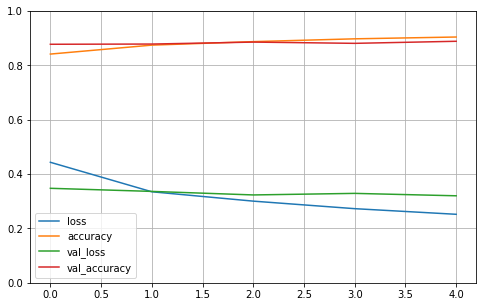

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [13]:
model.evaluate(X_test_std,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8760


[0.35611051321029663, 0.8759999871253967]